# Lasso Regression

train accuracy:	 0.3144775557349938
test accuracy:	 0.38697146490967516
present Alpha:	 4328.92162935857
[ 0.74948294  0.          0.          0.          0.          0.
 -0.         -0.          0.15379587  0.          0.06217592  0.12647445
  0.          0.17947912  0.         -0.        ]
(100,)
(16, 100)


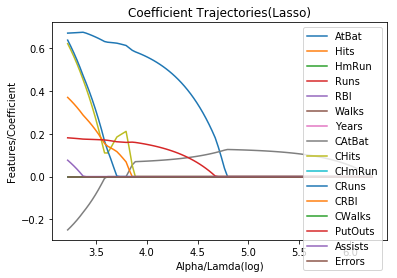

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV, lasso_path
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

####### Reading file
data = pd.read_csv('./dataset/Hitters.csv')
# print(data.head())

##### Simple data cleaning
data = data.fillna(value=0)
# print(data['Salary'])

###### Attributes classification
X = data.drop(columns=['League','Division','NewLeague', 'Salary']) # X has 16 features
X = X.drop(X.columns[0], axis=1)
y = data['Salary']
# print(X.head(),y.head())

##### Train & Test set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

##### Modelling and Fitting
LassoReg = linear_model.LassoCV()
LassoReg.fit(X_train, y_train)
print('train accuracy:\t', LassoReg.score(X_train, y_train))
print('test accuracy:\t', LassoReg.score(X_test, y_test))
print('present Alpha:\t', LassoReg.alpha_)
print(LassoReg.coef_)
# print(LassoReg.coef_) # type -> numpy.ndarray

##### Coefficient Trajectories Plotting
alphas, coefs, _ = lasso_path(X_train, y_train)
print (alphas.shape)
print (coefs.shape)


lgalphas = np.log10(alphas)
count_pre = 0

for i in range(16):
    plt.plot(lgalphas, coefs[i,:], label = X.columns[i])

plt.legend(loc='upper right')
plt.title("Coefficient Trajectories(Lasso)")
plt.xlabel("Alpha/Lamda(log)")
plt.ylabel("Features/Coefficient")
plt.show()


# Ridge Regression

train accuracy:	 0.46630275241483277
test accuracy:	 0.3419606431949984
optimal Alpha:	 7564.633275546306
(100,)
(100, 16)


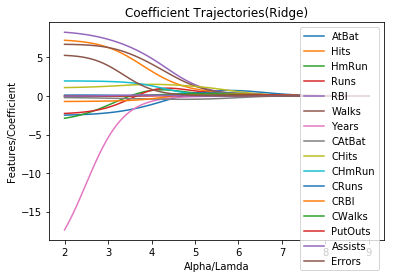

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

####### Reading file
data = pd.read_csv('./dataset/Hitters.csv')
# print(data.head())

##### Simple data cleaning
data = data.fillna(value=0)
# print(data['Salary'])

###### Attributes classification
X = data.drop(columns=['League','Division','NewLeague', 'Salary']) # X has 16 features
X = X.drop(X.columns[0], axis=1)
y = data['Salary']
# print(X.head(),y.head())

##### Train & Test set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

##### Modelling and Fitting
alpha_num = 100
alphas_r = np.logspace(-4,9,alpha_num)
RidgeReg = linear_model.RidgeCV(alphas=alphas_r)
RidgeReg.fit(X_train, y_train)
print('train accuracy:\t', RidgeReg.score(X_train, y_train))
print('test accuracy:\t', RidgeReg.score(X_test, y_test))
print('optimal Alpha:\t', RidgeReg.alpha_)
# print(RidgeReg.coef_)
# print(RidgeReg.coef_) # type -> numpy.ndarray

##### Coefficient Trajectories Collecting & Plotting
alphas_r = np.logspace(2,9,alpha_num)
print(alphas_r.shape)
coefs_r = np.zeros((100,16), dtype=np.double)
for i in range(alphas_r.shape[0]):
    a = alphas_r[i]
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_r[i,:] = ridge.coef_

print(coefs_r.shape)
lgalphas_r = np.log10(alphas_r)
for i in range(16):
    plt.plot(lgalphas_r, coefs_r[:,i], label = X.columns[i])
# plt.plot(lgalphas_r, coefs_r)
plt.legend(loc='upper right')
plt.title("Coefficient Trajectories(Ridge)")
plt.xlabel("Alpha/Lamda")
plt.ylabel("Features/Coefficient")
plt.show()

# Question 2
## Short Answer. (i) Explain in your own words the bias-variance tradeoﬀ. (ii) What role does regularization play in this tradeoﬀ? (iii) Make reference to your ﬁndings in number (1) to describe models of high/low bias and variance.

### (i) Bias can be understood as the prediction error rate in some way. In linear regression model, it can be measured by train accuracy and test accuracy, which can be easily considered as overall hit rate or how good this trained model at predicting. Meanwhile, Variance can be understood as the complexity of the model curve. Bias getting too large will cause underfitting. However, maller bias is always making variance too large at the same time. Large variance will cause overfitting and low stablity of predicting curve, which means that the curve is sentive to the distribution of data and is lack of accuracy while predicting test data most of time. In conclusion, both situation will cause total error(MSE) getting too big, so the bias-variance tradeoﬀ concentrates on avoiding uderfitting and overfitting.

### (ii) Regularization can be understood as penality, which constrains the range of parameters and the complexity of regression models. Regularization can avoid overfitting in some way. While, different lamdas in or different weights of regularization expression can cause different consequences. Lamda getting too large will cause high bias which will also cause underfitting. Small lamdas will cause high variance dilute the effects brought by regularization, so overfitting always comes up.

### (iii) High bias will cause underfitting, which can cause both 'train accuracy' and 'test accuracy' very low. When bias gets high enough, the regression curve will not make no difference between any meaningless random curve in the space. High variance can occur when lamda in regularization is very small, which means overfitting comes up. As what can be seen from coeﬃcient trajectories, when lamda getting smaller, the absolute value of coeﬃcients of all features getting bigger, which means each feature has huge impacts upon the predicting result. When too many features are strongly involved in this process, the 'test accuracy' will be comparably lower while 'train accuracy' will be comparably higher because almost all features are considered. When the amount of dataset is very small, both situations will be more obvious to observe. 